## Part 2: Programming - Pandas

In [1]:
#Question 1
#Question: Write a Python program that accepts a decimal number and the returns the number converted to all other bases:
#(Binary (base 2), Octal (base 8), Hexadecimal (base 16))

input = 43254 #The input number as decimal: (feel free to play around)

str = bin(input) # Using Pythons built-in function bin() to show the Binary (base 2) string equivilent to the "input" value
str = str[2:] # Due to the function bin() returning a string starting with "0b", we create a substring beginning with index 2
              # (meaning the 3rd character of the string) and ending at the end of the string.
print("The number", input, "converted to Binary is: ", str) # printing the results

str = oct(input) # Using Pythons built-in function oct() to show the Octal (base 8) string equivilent to the "input" value
str = str[2:] # Due to the function oct() returning a string starting with "0o", we create a substring beginning with index 2
              # (meaning the 3rd character of the string) and ending at the end of the string (as with bin()).
print("The number", input, "converted to Octal is: ", str) # printing the results

str = hex(input) # Using Pythons built-in function hex() to show the Hexadecimal (base 16) string equivilent to the "input" value
str = str[2:] # Due to the function hex() returning a string starting with "0x", we create a substring beginning with index 2
              # (meaning the 3rd character of the string) and ending at the end of the string (as with bin() and oct()).
print("The number", input, "converted to Hexadecimal is: ", str) # printing the results

In [34]:
import pandas as pd # Importing pandas
import matplotlib.pyplot as plt
import math
cast = pd.read_csv('cast.csv') # importing the dataframe 'cast.csv' from the root folder
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [26]:
#Question 2.1
#Question: How many movies have the title "Hamlet"?

hamletCount = cast.groupby('title').get_group('Hamlet').drop_duplicates(subset=['year'])
#Using groupby to isolate all films with the title "Hamlet", removing all duplicates (multiple roles to the same film -
#given no two films with the same name were shot in the same year).
print("The title 'Hamlet' was given to", len(hamletCount), 'films') # printing the result, using the length method to do so.

The title 'Hamlet' was given to 17 films


In [32]:
#Question 2.2
#Question: List all of the "Treasure Island" movies from earliest to most recent.

byYear = cast.sort_values(by=['year']) # Sorting the original dataframe by 'year' attribute (in ascending order).
#Because there are no NaN values accredited to this attribute, there is no need to manage them. Putting the sorted dataframe
#into a new variable
byYear = byYear.groupby('title').get_group('Treasure Island').drop_duplicates(subset=['year']) # Using the groupby method to
#divide the dataframe by movie titles, and saving the group that matches 'Treasure Island' into the same variable as the
#dataframe before, due to it being redundant. Removing all duplicates to show only films and not roles (as in previous question)
byYear = byYear.reset_index() #Resetting the indexes for appearance's sake.
byYear = byYear[['title', 'year']] #Displaying the needed columns: title, year and number of roles
print('All "Treasure Island" movies from earliest to most recent:') #Printing the result
byYear #Displaying the dataframe recieved by these manipulations

All "Treasure Island" movies from earliest to most recent:


,title,year
0,Treasure Island,1918
1,Treasure Island,1920
2,Treasure Island,1934
3,Treasure Island,1950
4,Treasure Island,1972
5,Treasure Island,1973
6,Treasure Island,1985
7,Treasure Island,1999


In [5]:
#Question 2.3
#Question: How many roles were credited in the silent 1921 version of Hamlet?

#Will use the same principle as the previous question
hamlets = cast.groupby('title').get_group('Hamlet') # Using the groupby method to divide the dataframe by movie
#titles, and saving the group that matches 'Hamlet' into a new variable
hamlets1921 = sum(hamlets.year == 1921) # Counting the number of records (in 'hamlets') which were created in 1921. This would
# mean that the record refers to the same movie ('Hamlet', created in 1921). Saving the result in a new variable.
# The sum in turn is the number of roles credited in the movie (which was asked in the question)
print('There were', hamlets1921, 'roles credited in the silent 1921 version of Hamlet') # printing the result

There were 9 roles credited in the silent 1921 version of Hamlet


The number of "Hamlet" films made each decade:


,count
year,
1910,3
1920,1
1940,1
1950,1
1960,2
1970,2
1980,1
1990,2
2000,2


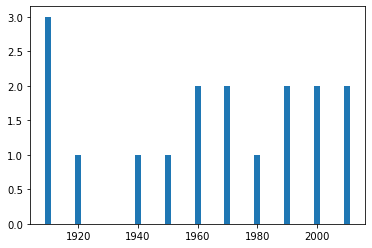

In [43]:
#Question 2.4
#Question: Use groupby() to plot the number of "Hamlet" films made each decade

hamlets = cast.groupby('title').get_group('Hamlet').drop_duplicates(subset=['year']) # Using the groupby method to divide
#the dataframe by movie titles, and saving the group that matches 'Hamlet' into a new variable (as in previous question).
#Removing all duplicates to show only films and not roles (as in previous questions)
def changeToDecade(year):
    #creating a function so that it accepts a year as an argument and returns the decade of that year (1939 will return 1930).
    #Accomplishing that by dividing the year by 10 (which results in a fraction in most cases), rounding down to the
    #nearest whole number and multiplying by 10. This will result is the first 3 digits of the year (given the year is a
    #4 digit number) followed by a 0, which is the decade we wanted to return.
    return math.floor(year/10) * 10 

for ind in hamlets.index: #Iterating over the dataframe "hamlets" and in each entry changing the year to the decade using the
    #"changeToDecade" function.
    hamlets.loc[ind, 'year'] = changeToDecade(hamlets.loc[ind, 'year'])

countDecades = hamlets.groupby('year').count()[['title']] #Grouping the resulting dataframe by decade (since all years now
#represent decades). All columns are unneeded - only the 1st column is shown.
countDecades.columns = ['count'] #Renaming the column from 'title' to 'count'.
print('The number of "Hamlet" films made each decade:') #presenting the results
plt.bar(countDecades.index, countDecades['count'], width = 2)
countDecades


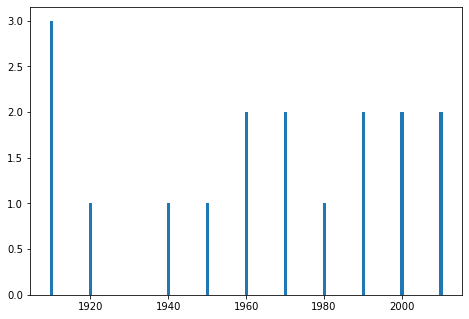

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = countDecades.index
students = countDecades['count']
ax.bar(langs,students)
plt.show()

In [8]:
#Question 2.5
#Question: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

leadRoles = cast.groupby('n').get_group(1.0) #Grouping the dataframe and selecting the dataframe of lead roles (where n=1.0)
leadRoles = leadRoles.groupby('year') #Grouping the lead roles by year
year = 1950 #defining a "year" variable to iterate over the 1950's decade (using the while loop to do so)
while(year <= 1959): #Iterating over the decade while the year is less than 1960
    #Using groupby to group the current year to divide actor vs actress (male vs female). Choosing first the actors and saving
    #the length of that group to a variable (signifying the amount of lead actors in the current year). Doing likewise with
    #actresses (grouping and counting)
    maleFemale = leadRoles.get_group(year).groupby('type').get_group('actor')
    actorCount = len(maleFemale.index)
    maleFemale = leadRoles.get_group(year).groupby('type').get_group('actress')
    actressCount = len(maleFemale.index)
    #Printing the result of the current year
    print('In the year', year, 'there were', actorCount, 'lead roles available to actors and', actressCount, 'lead roles available to actresses')
    year = year + 1 #adding 1 to a year to continue the calculations

In the year 1950 there were 604 lead roles available to actors and 271 lead roles available to actresses
In the year 1951 there were 633 lead roles available to actors and 272 lead roles available to actresses
In the year 1952 there were 591 lead roles available to actors and 284 lead roles available to actresses
In the year 1953 there were 634 lead roles available to actors and 290 lead roles available to actresses
In the year 1954 there were 626 lead roles available to actors and 298 lead roles available to actresses
In the year 1955 there were 606 lead roles available to actors and 264 lead roles available to actresses
In the year 1956 there were 614 lead roles available to actors and 288 lead roles available to actresses
In the year 1957 there were 708 lead roles available to actors and 284 lead roles available to actresses
In the year 1958 there were 694 lead roles available to actors and 275 lead roles available to actresses
In the year 1959 there were 678 lead roles available to

In [9]:
#Question 2.6
#Question: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

leadRoles = cast.groupby('n').get_group(1.0) #Grouping the dataframe and selecting the dataframe of lead roles (where n=1.0)
#(same as previous question)
leadRoles = leadRoles[leadRoles.year >= 1990] #Leaving only the movies shown since 1990.
leadActors = leadRoles.groupby('name').count() #Grouping all lead roles by actors and counting how many leading roles each
#actor (or actress) has.
leadActors = leadActors.sort_values('title',  ascending=False)[['title']] #sorting the dataframe according to the 1st column
#(name) in descending order meaning the actors with the most leading roles will be at the top of the dataframe. All columns
#are unneeded - only the 1st column is shown.
leadActors.columns = ['count'] #Renaming the column from 'title' to 'count'.
print('The actors and actresses with the most leading roles since 1990, and the amount of said roles:') #Printing the results
leadActors.head(10) #Showing the first 10 actors of the dataframe, as requested in the question.

The actors and actresses with the most leading roles since 1990, and the amount of said roles:


,count
name,
Mohanlal,126
Mammootty,118
Akshay Kumar,87
Jayaram,76
Andy Lau,72
Ajay Devgn,69
Amitabh Bachchan,68
Eric Roberts,68
Nagarjuna Akkineni,60


In [48]:
#Question 2.7
#Question:List, in order by year, each of the films in which Frank Oz has played more than 1 role

frankOz = cast.groupby('name').get_group('Frank Oz')#Grouping the dataframe and selecting the dataframe where Frank Oz starred
#This will be the main dataframe we work on
frankOzCount = frankOz.groupby('title').count()[['name']] #Initializing a new dataframe, grouping the frankOz dataframe by
#movie title,so setting it to be the count of roles Frank Oz starred in each film and leaving only a single column visible
#because all columns have the same values('name' was chosen but has no significance)
frankOzCount = frankOzCount[frankOzCount.name > 1] #Leaving in the dataframe only the films where frank Oz was cast for more
#than 1 role
frankOzCount.columns = ['number of roles'] #Renaming the column from 'name' to 'number of roles'.
frankOz = pd.merge(frankOz, frankOzCount, how = 'inner', on = 'title') #Merging the 2 dataframes created using
#merge(how='inner') meaning that only the common values shall be saved, all others lost. Because the frankOzCount dataframe has
#all the needed films where Frank Oz was cast for more than 1 role, all others need to be removed (which the merge()
#function does).
frankOz = frankOz.drop_duplicates(subset=['title']) #Now only the needed films are shown, but because Frank Oz was cast for more
#than 1 role for each film, there are more than 1 record for each film (for every role). We do not need that, so we use the
#function drop_duplicates() to keep only the first occurrence of each film name (There are no films he starred in that have the
#same name)
frankOz = frankOz.sort_values('year', ascending=False) #Sorting the films in descending order according to the year (earliest
#first)
frankOz = frankOz.reset_index() #Resetting the indexes for appearance's sake.
frankOz = frankOz[['title', 'year', 'number of roles']] #Displaying the needed columns: title, year and number of roles
print('The films in which Frank Oz has played more than 1 role in order by year (in descending order):') #printing the results
frankOz

The films in which Frank Oz has played more than 1 role in order by year (in descending order):


,title,year,number of roles
0,Muppets from Space,1999,4
1,The Adventures of Elmo in Grouchland,1999,3
2,Muppet Treasure Island,1996,4
3,The Muppet Christmas Carol,1992,7
4,Sesame Street Presents: Follow that Bird,1985,3
5,The Muppets Take Manhattan,1984,7
6,The Dark Crystal,1982,2
7,An American Werewolf in London,1981,2
8,The Great Muppet Caper,1981,6
9,The Muppet Movie,1979,8
